# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
#import funcoesProprias as fp
from statsmodels.api import qqplot

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
athletes.tail()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0
11537,711404576,le Roux Hamman,RSA,male,1/6/92,1.85,70.0,athletics,0,0,0


In [10]:
athletes.shape

(11538, 11)

In [9]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [7]:
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


explora = fp.dfExploracao(athletes)
explora

In [15]:
athletes.bronze.unique()

array([0, 1, 2], dtype=int64)

# #[col if col in ['id','name','dob'].join() for col in list(explora.colunas)]

aux=[]
for x in explora.colunas:
    if not x in ['id','name','dob']:
        aux.append(True)
    else:
        aux.append(False)

explora[aux]

colsObj = aux & (explora.tipos=='object')
colsObj = explora[colsObj].colunas

colsNum = (explora.colunas != 'id') & (explora.colunas != 'name') & (explora.tipos!='object')
colsNum = explora[colsNum].colunas

fp.plotNumVsNum(athletes[colsNum])

athletes[colsNum].hist(bins=30, figsize=(20,15))

fp.plotObjCols(athletes[colsObj])

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [70]:
dadosNorm = get_sample(athletes, 'height', n=3000)

pValor = sct.shapiro(dadosNorm)[1]
if pValor < .05:
    print('pValor: ', pValor,'\nnão é normal!')

pValor:  5.681722541339695e-07 
não é normal!


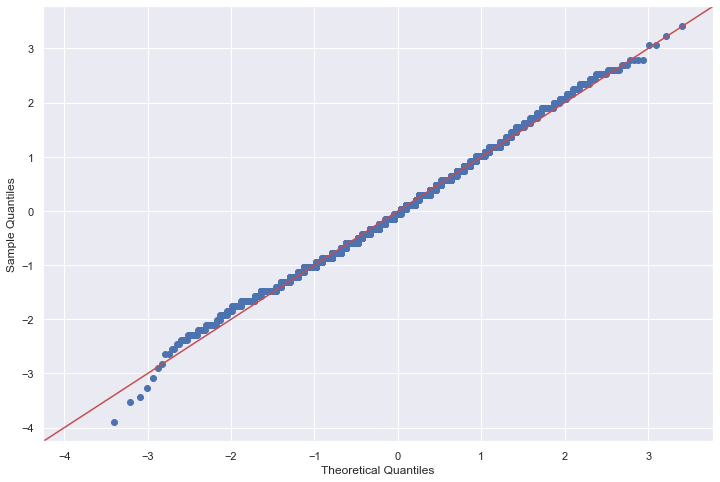

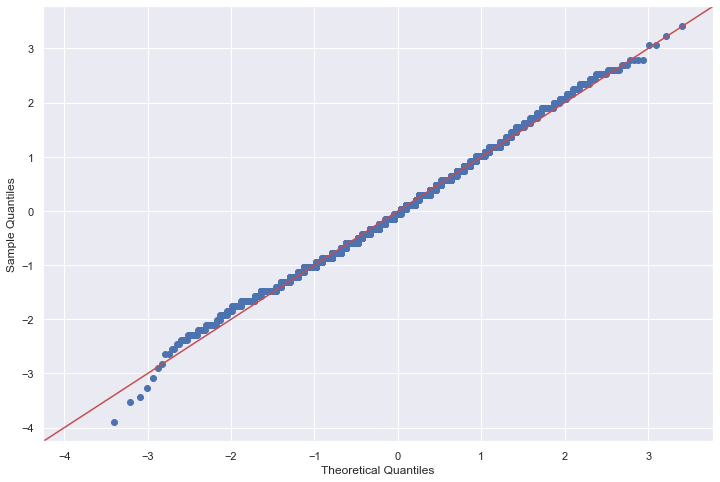

In [67]:
qqplot(dadosNorm, fit=True, line='45')

In [71]:
def q1():
    # Retorne aqui o resultado da questão 1.
    dadosNorm = get_sample(athletes, 'height', n=3000)

    pValor = sct.shapiro(dadosNorm)[1]
    if pValor < .05:
        print('pValor: ', pValor,'\nnão é normal!')
        return False
    else:
        return True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

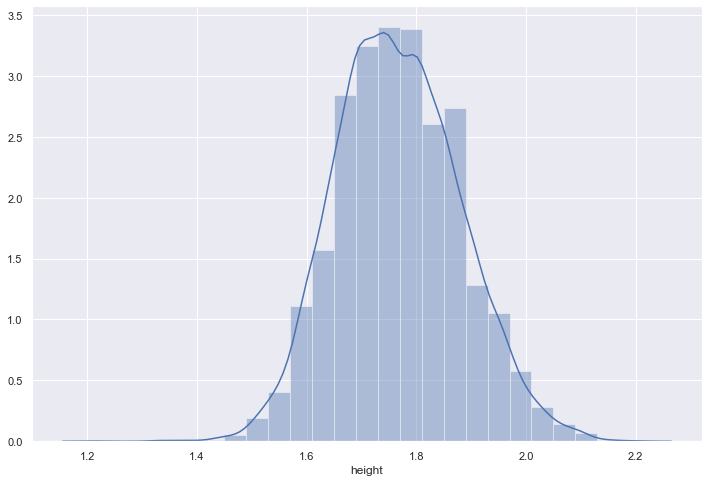

In [86]:
sns.distplot(athletes['height'], bins=25)

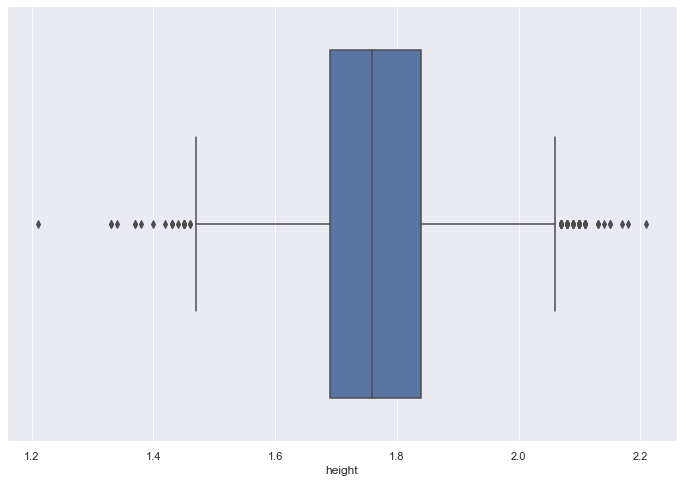

In [87]:
sns.boxplot(athletes['height'])

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [76]:
pValor = sct.jarque_bera(dadosNorm)[1]

if pValor < .05:
    print('pValor: ',pValor,'\nnão é normal')

pValor:  0.001478366424594868 
não é normal


In [78]:
def q2():
    # Retorne aqui o resultado da questão 2.
    dadosNorm = get_sample(athletes, 'height', n=3000)
    pValor = sct.jarque_bera(dadosNorm)[1]

    if pValor < .05:
        print('pValor: ',pValor,'\nnão é normal')
        return False
    else: 
        return True

__Para refletir__:

* Esse resultado faz sentido?

Sim, pois a assimetria e a curtose lembram uma distribuição normal, logo o p-valor não foi tão pequeno como no Shapiro, diminuindo a certeza de rejeição de H0.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [88]:
dadosNorm = get_sample(athletes, 'weight', n=3000)

sct.normaltest(dadosNorm).pvalue


1.5898922918029537e-111

In [89]:
def q3():
    # Retorne aqui o resultado da questão 3.
    dadosNorm = get_sample(athletes, 'weight', n=3000)
    
    if sct.normaltest(dadosNorm).pvalue < .05:
        return False
    else: 
        return True

In [90]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

Sim, a cauda não parece de uma normal.

* Um _box plot_ também poderia ajudar a entender a resposta.

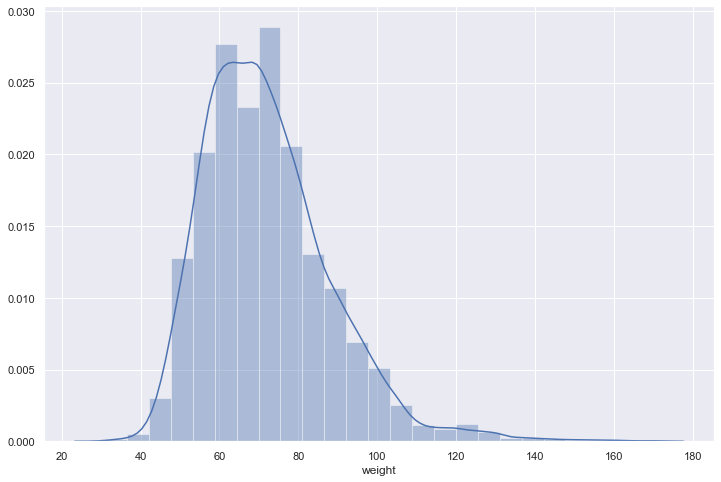

In [81]:
sns.distplot(athletes['weight'], bins=25)

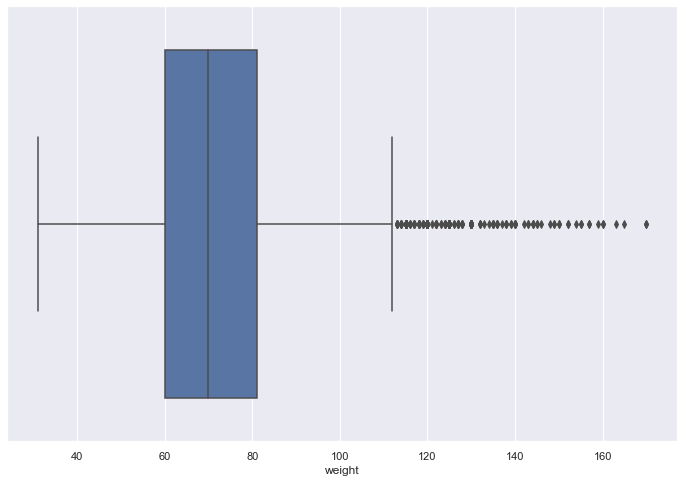

In [85]:
sns.boxplot(athletes['weight'])

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [92]:
dadosNorm = np.log(get_sample(athletes, 'weight', n=3000))

sct.normaltest(dadosNorm).pvalue


1.0705572101256944e-10

In [93]:
def q4():
    # Retorne aqui o resultado da questão 4.
    dadosNorm = np.log(get_sample(athletes, 'weight', n=3000))
    
    if sct.normaltest(dadosNorm).pvalue < .05:
        return False
    else:
        return True

In [97]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

Sim, se aproximou de uma normal.

* Você esperava um resultado diferente agora?

Sim.

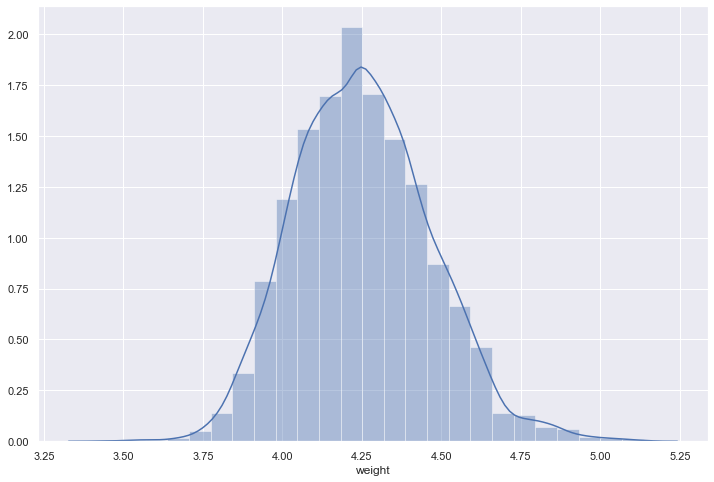

In [95]:
sns.distplot(np.log(athletes['weight']), bins=25)

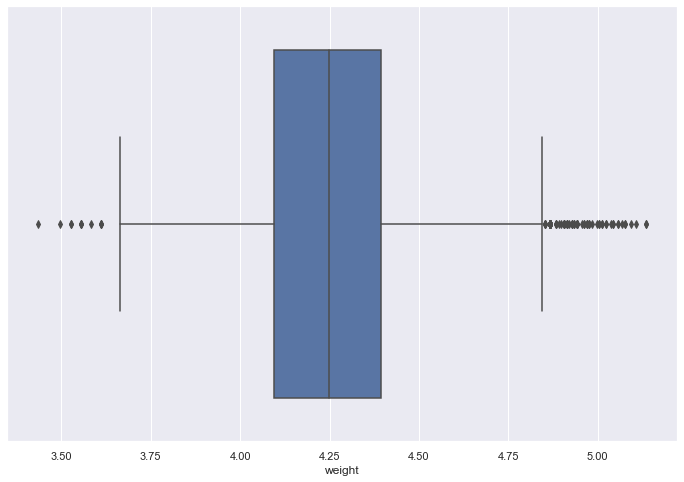

In [96]:
sns.boxplot(np.log(athletes['weight']))

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [112]:
filtro = athletes['nationality'].str.contains('BRA|USA|CAN')
aux = athletes[filtro]

# bra
bra = aux[aux.nationality.str.contains('BRA')]
usa = aux[aux.nationality.str.contains('USA')]

In [108]:
print('dimensoes',bra.shape, usa.shape)
print('variancias',bra.height.std()**2, usa.height.std()**2)
print('media',bra.height.mean(), usa.height.mean())

dimensoes (485, 11) (567, 11)
variancias 0.013779906236178684 0.014151895923843595
media 1.764033613445378 1.787767857142857


In [124]:
pValor = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit').pvalue
print('pValor: ',pValor)

if pValor < .05:
    print('as médias não são iguais!')
else:
    print('as médias são iguais')

pValor:  0.0013080041830140115
as médias não são iguais!


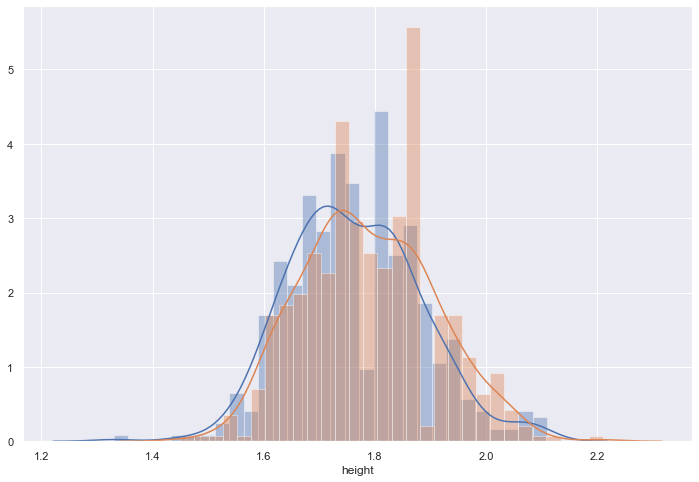

In [129]:
sns.distplot(bra.height, bins=30)
sns.distplot(usa.height, bins=30)

In [125]:
def q5():
    # Retorne aqui o resultado da questão 5.
    filtro = athletes['nationality'].str.contains('BRA|USA|CAN')
    aux = athletes[filtro]

    # bra
    bra = aux[aux.nationality.str.contains('BRA')]
    usa = aux[aux.nationality.str.contains('USA')]

    pValor = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit').pvalue
    print('pValor: ',pValor)

    if pValor < .05:
        print('as médias não são iguais!')
        return False
    else:
        print('as médias são iguais')
        return True
    

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [130]:
filtro = athletes['nationality'].str.contains('BRA|USA|CAN')
aux = athletes[filtro]

# bra
bra = aux[aux.nationality.str.contains('BRA')]
can = aux[aux.nationality.str.contains('CAN')]

print('dimensoes',bra.shape, can.shape)
print('variancias',bra.height.std()**2, can.height.std()**2)
print('media',bra.height.mean(), can.height.mean())

pValor = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit').pvalue
print('pValor: ',pValor)

if pValor < .05:
    print('as médias não são iguais!')
else:
    print('as médias são iguais')

dimensoes (485, 11) (321, 11)
variancias 0.013779906236178684 0.013932499020376172
media 1.764033613445378 1.75859375
pValor:  0.5230827295440921
as médias são iguais


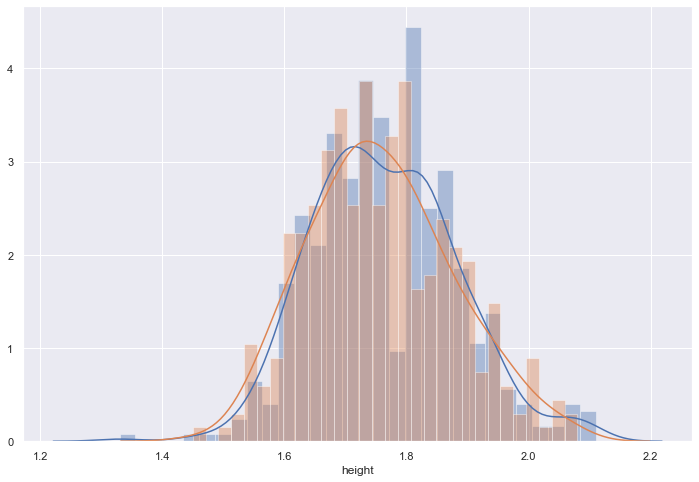

In [131]:
sns.distplot(bra.height, bins=30)
sns.distplot(can.height, bins=30)

In [132]:
def q6():
    filtro = athletes['nationality'].str.contains('BRA|USA|CAN')
    aux = athletes[filtro]

    # bra
    bra = aux[aux.nationality.str.contains('BRA')]
    can = aux[aux.nationality.str.contains('CAN')]

    print('dimensoes',bra.shape, can.shape)
    print('variancias',bra.height.std()**2, can.height.std()**2)
    print('media',bra.height.mean(), can.height.mean())

    pValor = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit').pvalue
    print('pValor: ',pValor)

    if pValor < .05:
        print('as médias não são iguais!')
        return False
    else:
        print('as médias são iguais')
        return True

In [133]:
q6()

dimensoes (485, 11) (321, 11)
variancias 0.013779906236178684 0.013932499020376172
media 1.764033613445378 1.75859375
pValor:  0.5230827295440921
as médias são iguais


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [140]:
filtro = athletes['nationality'].str.contains('BRA|USA|CAN')
aux = athletes[filtro]

# bra
usa = aux[aux.nationality.str.contains('USA')]
can = aux[aux.nationality.str.contains('CAN')]

print('dimensoes',usa.shape, can.shape)
print('variancias',usa.height.std()**2, can.height.std()**2)
print('media',usa.height.mean(), can.height.mean())

pValor = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit').pvalue
print('pValor: ',pValor)

if pValor < .05:
    print('as médias não são iguais!')
    #return False
else:
    print('as médias são iguais')
    #return True

dimensoes (567, 11) (321, 11)
variancias 0.014151895923843595 0.013932499020376172
media 1.787767857142857 1.75859375
pValor:  0.0004660129347389851
as médias não são iguais!


In [141]:
def q7():
    filtro = athletes['nationality'].str.contains('BRA|USA|CAN')
    aux = athletes[filtro]

    # bra
    usa = aux[aux.nationality.str.contains('USA')]
    can = aux[aux.nationality.str.contains('CAN')]

    print('dimensoes',usa.shape, can.shape)
    print('variancias',usa.height.std()**2, can.height.std()**2)
    print('media',usa.height.mean(), can.height.mean())

    pValor = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit').pvalue
    print('pValor: ',pValor)

    return float(round(pValor, 8))

In [143]:
q7()

dimensoes (567, 11) (321, 11)
variancias 0.014151895923843595 0.013932499020376172
media 1.787767857142857 1.75859375
pValor:  0.0004660129347389851


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?